## Mineração de Texto

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

from bs4 import BeautifulSoup

import json
import pandas as pd
import os

import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation

from nltk.probability import FreqDist

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\regia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
load_file = "..\\Datasets\\JSON\\crawled_pages.json"
data = pd.read_json(load_file, orient='records', encoding='utf-8')
data.head(50)

,assunto_noticia,autor_noticia,categoria_noticia,subtitulo_noticia,tags_noticia,texto_noticia,titulo_noticia,titulo_pagina,url_pagina
0,Covid-19,Com informações do,"Finanças, Impostos e Gestão Pública",Painel de Compras Covid-19 mostra a compra de ...,Covid-19PandemiaGestão,"<div property=""rnews:articleBody""><p class="" ""...",Investimento Federal em insumos de saúde somam...,Investimento Federal em insumos de saúde somam...,https://www.gov.br/pt-br/noticias/financas-imp...
1,Auxílio Emergencial,Com informações da,Assistência Social,Nascidos de janeiro a abril poderão sacar o be...,Auxílio EmergencialFGTSCaixa Economica Federal...,"<div property=""rnews:articleBody""><p style=""te...",Caixa vai abrir 770 agências para atender bene...,Caixa vai abrir 770 agências para atender bene...,https://www.gov.br/pt-br/noticias/assistencia-...
2,Benefício,Com informações do,Assistência Social,"São 89,1 mil devoluções registradas por civis ...",Auxílio EmergencialDevoluçõesTransparência#Cov...,"<div property=""rnews:articleBody""><p style=""te...",Auxílio Emergencial: quase R$ 110 milhões são ...,Auxílio Emergencial: quase R$ 110 milhões são ...,https://www.gov.br/pt-br/noticias/assistencia-...
3,Desenvolvimento,None,"Infraestrutura, Trânsito e Transportes",Presidente Jair Bolsonaro visitou as obras da ...,Desenvolvimento Regional MDR#infraestruturaPre...,"<div property=""rnews:articleBody""><p style=""te...",Obras de recuperação de ponte em São Vicente (...,Obras de recuperação de ponte em São Vicente (...,https://www.gov.br/pt-br/noticias/transito-e-t...
4,COVID-19,Com informações da,Assistência Social,"Durante a ação, também foram distribuídas másc...",#Covid19FUNAICestas de AlimentosLínguas indígenas,"<div property=""rnews:articleBody""><p style=""te...",Funai entrega 720 cestas de alimentos a indíge...,Funai entrega 720 cestas de alimentos a indíge...,https://www.gov.br/pt-br/noticias/assistencia-...
5,Mulher,None,Assistência Social,Rede de atendimento engloba serviços em difere...,Lei Maria da Penha#mulheres180 Disque Denúncia,"<div property=""rnews:articleBody""><p style=""te...",Modernização no atendimento à mulher em situaç...,Modernização no atendimento à mulher em situaç...,https://www.gov.br/pt-br/noticias/assistencia-...
6,Covid-19,None,Saúde e Vigilância Sanitária,Participam do teste cerca de 850 voluntários p...,#Covid-19VVacinaMinistério da SaúdePandemia#Co...,"<div property=""rnews:articleBody""><p style=""te...",UnB e Hospital Universitário de Brasília fazem...,UnB e Hospital Universitário de Brasília fazem...,https://www.gov.br/pt-br/noticias/saude-e-vigi...
7,Pandemia,Com informações da,Saúde e Vigilância Sanitária,Serviço conta com consultas em saúde mental e ...,Indígenas#Covid-19#CoronavirusNoBrasilAssistên...,"<div property=""rnews:articleBody""><p style=""te...",Hospital Universitário de Brasília oferece ate...,Hospital Universitário de Brasília oferece ate...,https://www.gov.br/pt-br/noticias/saude-e-vigi...


In [3]:
type(data)
data.columns 

Index(['assunto_noticia', 'autor_noticia', 'categoria_noticia',
       'subtitulo_noticia', 'tags_noticia', 'texto_noticia', 'titulo_noticia',
       'titulo_pagina', 'url_pagina'],
      dtype='object')

#### Limpeza de texto

In [4]:
textos = []

for texto in data.texto_noticia:
    # Removendo hashtags
    texto = re.sub(r'#\S+', '', texto)

    # Remove mentions ou menções
    texto = re.sub(r'@\S+', '', texto)

    # Remove hyperlinks
    texto = re.sub(r'https?:\/\/.*[\r\n]*', '', texto)

    # Remove stock market tickets like $GE
    texto = re.sub(r'\$\w*', '', texto)

    # Remove números
    texto = re.sub('[0-9]+', '', texto)
    textos.append(BeautifulSoup(texto).get_text())

data.texto_noticia = textos
data.head()

,assunto_noticia,autor_noticia,categoria_noticia,subtitulo_noticia,tags_noticia,texto_noticia,titulo_noticia,titulo_pagina,url_pagina
0,Covid-19,Com informações do,"Finanças, Impostos e Gestão Pública",Painel de Compras Covid-19 mostra a compra de ...,Covid-19PandemiaGestão,"Desde a publicação da Lei nº ., em de feverei...",Investimento Federal em insumos de saúde somam...,Investimento Federal em insumos de saúde somam...,https://www.gov.br/pt-br/noticias/financas-imp...
1,Auxílio Emergencial,Com informações da,Assistência Social,Nascidos de janeiro a abril poderão sacar o be...,Auxílio EmergencialFGTSCaixa Economica Federal...,A Caixa Econômica vai abrir agências neste sá...,Caixa vai abrir 770 agências para atender bene...,Caixa vai abrir 770 agências para atender bene...,https://www.gov.br/pt-br/noticias/assistencia-...
2,Benefício,Com informações do,Assistência Social,"São 89,1 mil devoluções registradas por civis ...",Auxílio EmergencialDevoluçõesTransparência#Cov...,Foram efetuadas cerca de mil devoluções de pe...,Auxílio Emergencial: quase R$ 110 milhões são ...,Auxílio Emergencial: quase R$ 110 milhões são ...,https://www.gov.br/pt-br/noticias/assistencia-...
3,Desenvolvimento,None,"Infraestrutura, Trânsito e Transportes",Presidente Jair Bolsonaro visitou as obras da ...,Desenvolvimento Regional MDR#infraestruturaPre...,O presidente Jair Bolsonaro e o ministro do De...,Obras de recuperação de ponte em São Vicente (...,Obras de recuperação de ponte em São Vicente (...,https://www.gov.br/pt-br/noticias/transito-e-t...
4,COVID-19,Com informações da,Assistência Social,"Durante a ação, também foram distribuídas másc...",#Covid19FUNAICestas de AlimentosLínguas indígenas,A Fundação Nacional do Índio (Funai) concluiu ...,Funai entrega 720 cestas de alimentos a indíge...,Funai entrega 720 cestas de alimentos a indíge...,https://www.gov.br/pt-br/noticias/assistencia-...


#### Tokenização

In [5]:
for texto in data.texto_noticia:
    sentencas = sent_tokenize(texto.lower())
    
sentencas

['o hospital universitário da universidade de brasília criou um programa de telessaúde para atender às comunidades indígenas do distrito federal, incluindo os alunos da unb.',
 'a iniciativa é coordenada pelo ambulatório de saúde indígena do hub e conta com orientações sobre covid- e outras doenças, teleconsultas em várias especialidades, espaços para troca de conhecimento entre as comunidades e discussões virtuais em grupo, com equipe multiprofissional.',
 '“com esse projeto, conseguimos ampliar a oferta de serviços de saúde com segurança e garantimos o atendimento universal”, afirma o chefe da divisão médica do hub, luciano talma.',
 'com febre, dor de cabeça, coriza e falta de ar, o estudante de ciência política da unb, danilo tupinikim, de  anos, procurou o teleatendimento.',
 'por apresentar sintomas de covid-, danilo foi orientado a ir ao hub, onde realizou o exame rt-pcr para diagnóstico da doença e recebeu orientações para ficar em repouso e em isolamento por  dias.',
 'até a l

In [6]:
for texto in data.texto_noticia:
    palavras = word_tokenize(texto.lower())
    
palavras

['o',
 'hospital',
 'universitário',
 'da',
 'universidade',
 'de',
 'brasília',
 'criou',
 'um',
 'programa',
 'de',
 'telessaúde',
 'para',
 'atender',
 'às',
 'comunidades',
 'indígenas',
 'do',
 'distrito',
 'federal',
 ',',
 'incluindo',
 'os',
 'alunos',
 'da',
 'unb',
 '.',
 'a',
 'iniciativa',
 'é',
 'coordenada',
 'pelo',
 'ambulatório',
 'de',
 'saúde',
 'indígena',
 'do',
 'hub',
 'e',
 'conta',
 'com',
 'orientações',
 'sobre',
 'covid-',
 'e',
 'outras',
 'doenças',
 ',',
 'teleconsultas',
 'em',
 'várias',
 'especialidades',
 ',',
 'espaços',
 'para',
 'troca',
 'de',
 'conhecimento',
 'entre',
 'as',
 'comunidades',
 'e',
 'discussões',
 'virtuais',
 'em',
 'grupo',
 ',',
 'com',
 'equipe',
 'multiprofissional',
 '.',
 '“',
 'com',
 'esse',
 'projeto',
 ',',
 'conseguimos',
 'ampliar',
 'a',
 'oferta',
 'de',
 'serviços',
 'de',
 'saúde',
 'com',
 'segurança',
 'e',
 'garantimos',
 'o',
 'atendimento',
 'universal',
 '”',
 ',',
 'afirma',
 'o',
 'chefe',
 'da',
 'divisão

In [7]:
for texto in data.texto_noticia:
    sentencas = sent_tokenize(texto)
    
sentencas

['O Hospital Universitário da Universidade de Brasília criou um programa de telessaúde para atender às comunidades indígenas do Distrito Federal, incluindo os alunos da UnB.',
 'A iniciativa é coordenada pelo Ambulatório de Saúde Indígena do HUB e conta com orientações sobre Covid- e outras doenças, teleconsultas em várias especialidades, espaços para troca de conhecimento entre as comunidades e discussões virtuais em grupo, com equipe multiprofissional.',
 '“Com esse projeto, conseguimos ampliar a oferta de serviços de saúde com segurança e garantimos o atendimento universal”, afirma o chefe da Divisão Médica do HUB, Luciano Talma.',
 'Com febre, dor de cabeça, coriza e falta de ar, o estudante de Ciência Política da UnB, Danilo Tupinikim, de  anos, procurou o teleatendimento.',
 'Por apresentar sintomas de Covid-, Danilo foi orientado a ir ao HUB, onde realizou o exame RT-PCR para diagnóstico da doença e recebeu orientações para ficar em repouso e em isolamento por  dias.',
 'Até a l

#### Remoção de Stopwords

In [8]:
stopwords = set(stopwords.words('portuguese') + list(punctuation))

In [9]:
for texto in data.texto_noticia:
    palavras = word_tokenize(texto.lower())

palavrasLimpas = [palavra for palavra in palavras if palavra not in stopwords]

palavrasLimpas

['hospital',
 'universitário',
 'universidade',
 'brasília',
 'criou',
 'programa',
 'telessaúde',
 'atender',
 'comunidades',
 'indígenas',
 'distrito',
 'federal',
 'incluindo',
 'alunos',
 'unb',
 'iniciativa',
 'coordenada',
 'ambulatório',
 'saúde',
 'indígena',
 'hub',
 'conta',
 'orientações',
 'sobre',
 'covid-',
 'outras',
 'doenças',
 'teleconsultas',
 'várias',
 'especialidades',
 'espaços',
 'troca',
 'conhecimento',
 'comunidades',
 'discussões',
 'virtuais',
 'grupo',
 'equipe',
 'multiprofissional',
 '“',
 'projeto',
 'conseguimos',
 'ampliar',
 'oferta',
 'serviços',
 'saúde',
 'segurança',
 'garantimos',
 'atendimento',
 'universal',
 '”',
 'afirma',
 'chefe',
 'divisão',
 'médica',
 'hub',
 'luciano',
 'talma',
 'febre',
 'dor',
 'cabeça',
 'coriza',
 'falta',
 'ar',
 'estudante',
 'ciência',
 'política',
 'unb',
 'danilo',
 'tupinikim',
 'anos',
 'procurou',
 'teleatendimento',
 'apresentar',
 'sintomas',
 'covid-',
 'danilo',
 'orientado',
 'ir',
 'hub',
 'onde',
 '

#### Gerar bag of words

In [10]:
frequencia = FreqDist(palavrasLimpas)
frequencia

FreqDist({'saúde': 12, 'indígena': 8, 'unb': 5, '“': 5, 'atendimento': 5, '”': 5, 'comunidades': 4, 'indígenas': 4, 'ambulatório': 4, 'hub': 4, ...})

In [11]:
words_clean = ' '.join(palavrasLimpas)

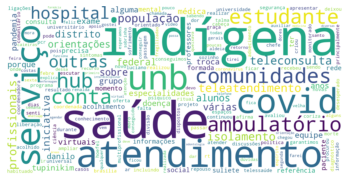

In [12]:
warnings.simplefilter('ignore')

wc = WordCloud(
    min_font_size=10,
    max_font_size=300,
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000,
    normalize_plurals=True).generate(words_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('governo.png', dp=300)
plt.show()

In [13]:
new_stopwords = nltk.corpus.stopwords.words('portuguese')
#new_stopwords.append('todo')
#new_stopwords.append('todos')
new_stopwords.append('pa')

In [14]:
palavrasLimpas = [palavra for palavra in palavrasLimpas if palavra not in new_stopwords]
palavrasLimpas

['hospital',
 'universitário',
 'universidade',
 'brasília',
 'criou',
 'programa',
 'telessaúde',
 'atender',
 'comunidades',
 'indígenas',
 'distrito',
 'federal',
 'incluindo',
 'alunos',
 'unb',
 'iniciativa',
 'coordenada',
 'ambulatório',
 'saúde',
 'indígena',
 'hub',
 'conta',
 'orientações',
 'sobre',
 'covid-',
 'outras',
 'doenças',
 'teleconsultas',
 'várias',
 'especialidades',
 'espaços',
 'troca',
 'conhecimento',
 'comunidades',
 'discussões',
 'virtuais',
 'grupo',
 'equipe',
 'multiprofissional',
 '“',
 'projeto',
 'conseguimos',
 'ampliar',
 'oferta',
 'serviços',
 'saúde',
 'segurança',
 'garantimos',
 'atendimento',
 'universal',
 '”',
 'afirma',
 'chefe',
 'divisão',
 'médica',
 'hub',
 'luciano',
 'talma',
 'febre',
 'dor',
 'cabeça',
 'coriza',
 'falta',
 'ar',
 'estudante',
 'ciência',
 'política',
 'unb',
 'danilo',
 'tupinikim',
 'anos',
 'procurou',
 'teleatendimento',
 'apresentar',
 'sintomas',
 'covid-',
 'danilo',
 'orientado',
 'ir',
 'hub',
 'onde',
 '

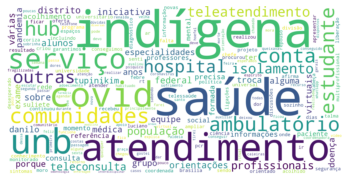

In [15]:
words_clean = " ".join(palavrasLimpas)
wc = WordCloud(
    min_font_size=10,
    max_font_size=300,
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000,
    normalize_plurals=True).generate(words_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('home_office.png', dp=300)
plt.show()